In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [2]:
from keras.models import Model
import keras.layers as L
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [3]:
data = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv')

In [4]:
data.rename(columns = {'0': 'labels'}, inplace = True)

In [5]:
X = data.drop('labels', axis = 1)
Y = data['labels']
X.shape, Y.shape

((372450, 784), (372450,))

In [6]:
(xTrain, xTest, yTrain, yTest) = train_test_split(X, Y)

In [7]:
scaler = MinMaxScaler()
scaler.fit(xTrain)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

In [9]:
xTest.shape, xTrain.shape

((93113, 784), (279337, 784))

In [10]:
xTrain = xTrain.reshape((xTrain.shape[0], 28, 28, 1)).astype('float32')
xTest = xTest.reshape((xTest.shape[0], 28, 28, 1)).astype('float32')
xTrain.shape, xTest.shape, yTrain.shape

((279337, 28, 28, 1), (93113, 28, 28, 1), (279337,))

In [11]:
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)
yTrain.shape, yTest.shape

((279337, 26), (93113, 26))

In [12]:
numClasses = yTrain.shape[1]
numClasses

26

In [13]:
# use keras.models.Model to save as .h5
Xinp = L.Input((28, 28, 1))
X = L.Conv2D(64, (5, 5), activation = 'relu', data_format = 'channels_last', padding = 'same')(Xinp)
X = L.Conv2D(64, (5, 5), activation = 'relu', data_format = 'channels_last', padding = 'same')(X)
X = L.MaxPooling2D(pool_size = (2, 2))(X)

X = L.Conv2D(128, (3, 3), activation = 'relu', data_format = 'channels_last', padding = 'same')(X)
X = L.Conv2D(128, (3, 3), activation = 'relu', data_format = 'channels_last', padding = 'same')(X)
X = L.MaxPooling2D(pool_size = (2, 2))(X)

X = L.Dropout(0.2)(X)

X = L.Flatten()(X)
X = L.Dense(128, activation = 'relu')(X)
X = L.Dense(128, activation = 'relu')(X)
X = L.Dense(numClasses, activation = 'softmax')(X)

model = Model(inputs=Xinp, outputs=X)

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0   

In [16]:
model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=10, batch_size=256)

Train on 279337 samples, validate on 93113 samples
Epoch 1/10
279337/279337 [==============================] - 35s 127us/step - loss: 0.1735 - accuracy: 0.9519 - val_loss: 0.0566 - val_accuracy: 0.9844
Epoch 2/10
279337/279337 [==============================] - 31s 111us/step - loss: 0.0482 - accuracy: 0.9862 - val_loss: 0.0434 - val_accuracy: 0.9881
Epoch 3/10
279337/279337 [==============================] - 31s 111us/step - loss: 0.0363 - accuracy: 0.9894 - val_loss: 0.0419 - val_accuracy: 0.9883
Epoch 4/10
279337/279337 [==============================] - 32s 113us/step - loss: 0.0292 - accuracy: 0.9913 - val_loss: 0.0332 - val_accuracy: 0.9908
Epoch 5/10
279337/279337 [==============================] - 31s 111us/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0308 - val_accuracy: 0.9920
Epoch 6/10
279337/279337 [==============================] - 31s 112us/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0287 - val_accuracy: 0.9923
Epoch 7/10
279337/279337 [=================

In [18]:
from pickle import dump
model.save('model.h5')
with open("scaler.pickle", "wb") as fh:
    dump(scaler, fh)

O


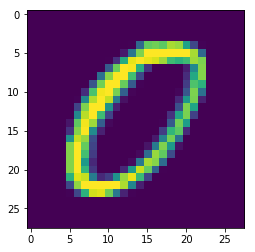

In [19]:
import matplotlib.pyplot as plt
chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
img = xTest[1].reshape((28, 28))
pred = chars[model.predict(img.reshape((1, 28, 28, 1)))[0].argmax()]
plt.imshow(img)
print(pred)